In [101]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

In [102]:
file_to_df = pd.read_json("/home/louis/LEON/DATA/Atoms/2024/PINNS2/CNN/model_analysis_1power.json")
df_to_json = file_to_df.to_json()
json_to_dict = json.loads(df_to_json )

Model comparison

In [103]:
model_v2_accuracy = []
model_v2_index_error = []

model_v3_accuracy = []
model_v3_index_error = []

model_v4_accuracy = []
model_v4_index_error = []

model_v5_accuracy = []
model_v5_index_error = []

data_types = ["amp", "amp_pha", "amp_pha_unwrap", "pha", "pha_unwrap"]
noise_types = ["noise", "no_noise"]
model_types = [["model_resnetv2_1powers",model_v2_accuracy,model_v2_index_error],
                ["model_resnetv3_1powers",model_v3_accuracy,model_v3_index_error], 
                ["model_resnetv4_1powers",model_v4_accuracy,model_v4_index_error],
                ["model_resnetv5_1powers",model_v5_accuracy,model_v5_index_error]]

for data_type in data_types:
    for noise_type in noise_types:
        for properties in model_types:
            model_type = properties[0]
            model_accuracy = properties[1]
            model_index_error = properties[2]

            model_accuracy += json_to_dict[data_type][model_type][noise_type]["accuracy"] 
            model_index_error += json_to_dict[data_type][model_type][noise_type]["index_error"]

In [104]:
for index in range(len(model_types)):
    model_types[index][1] = np.array(model_types[index][1])
    model_types[index][2] = np.array(model_types[index][2])

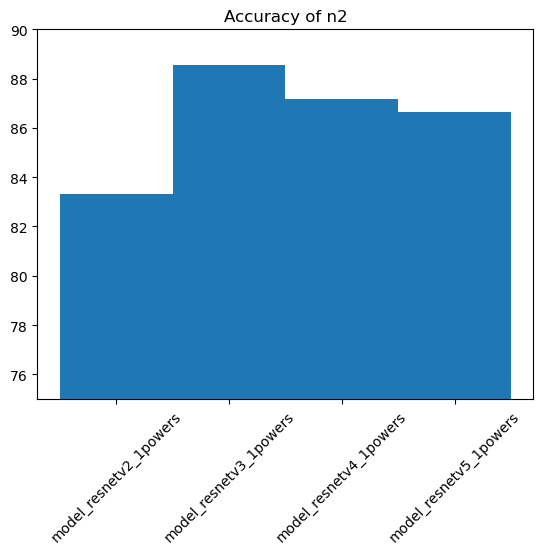

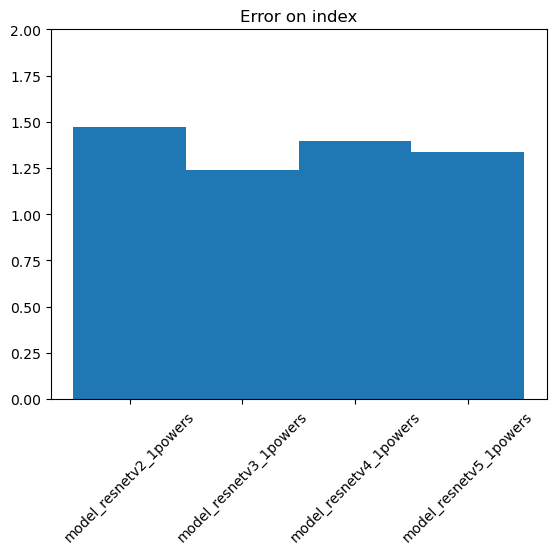

In [105]:
mean_accuracy_models = np.zeros(4)
mean_index_error_models = np.zeros(4)
models_list = []


for index in range(len(model_types)):
    models_list += [model_types[index][0]]
    mean_accuracy_models[index] = np.mean(model_types[index][1])
    mean_index_error_models[index] = np.mean(model_types[index][2])

x_positions = [0.5, 1.5, 2.5, 3.5]
y_positions = [75,90]
# plt.figure(figsize=(10,10))
plt.title("Accuracy of n2")
plt.stairs(mean_accuracy_models, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, models_list, rotation=45)
plt.show()

x_positions = [0.5, 1.5, 2.5, 3.5]
y_positions = [0,2]
# plt.figure(figsize=(10,10))
plt.title("Error on index")
plt.stairs(mean_index_error_models, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, models_list, rotation=45)
plt.show()

Best model is model_resnetv3

Datatype comparison

In [106]:
amp_accuracy = []
amp_index_error = []

amp_pha_accuracy = []
amp_pha_index_error = []

amp_pha_unwrap_accuracy = []
amp_pha_unwrap_index_error = []

pha_accuracy = []
pha_index_error = []

pha_unwrap_accuracy = []
pha_unwrap_index_error = []

data_types = [["amp", amp_accuracy, amp_index_error],
              ["amp_pha", amp_pha_accuracy, amp_pha_index_error],
               ["amp_pha_unwrap", amp_pha_unwrap_accuracy, amp_pha_unwrap_index_error],
                ["pha", pha_accuracy, pha_index_error],
                 ["pha_unwrap", pha_unwrap_accuracy, pha_unwrap_index_error]]


noise_types = ["noise", "no_noise"]
model_types = ["model_resnetv2_1powers","model_resnetv3_1powers","model_resnetv4_1powers","model_resnetv5_1powers"]

for model_type in model_types:
    for noise_type in noise_types:
        for properties in data_types:
            data_type = properties[0]
            data_accuracy = properties[1]
            data_index_error = properties[2]

            data_accuracy += json_to_dict[data_type][model_type][noise_type]["accuracy"] 
            data_index_error += json_to_dict[data_type][model_type][noise_type]["index_error"]

In [107]:
for index in range(len(data_types)):
    data_types[index][1] = np.array(data_types[index][1])
    data_types[index][2] = np.array(data_types[index][2])

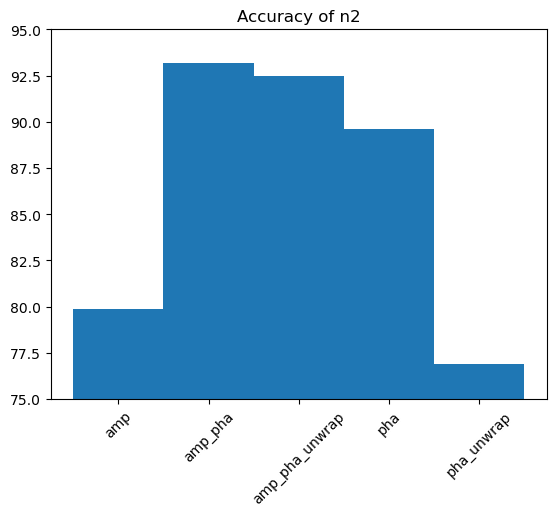

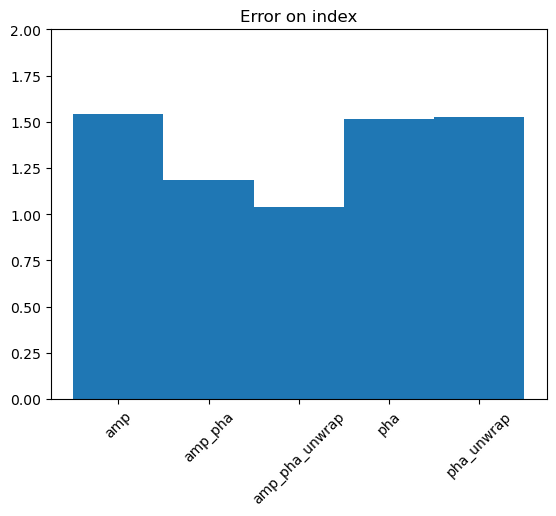

In [108]:
mean_accuracy_data = np.zeros(5)
mean_index_error_data = np.zeros(5)
data_type_list = []


for index in range(len(data_types)):
    data_type_list += [data_types[index][0]]
    mean_accuracy_data[index] = np.mean(data_types[index][1])
    mean_index_error_data[index] = np.mean(data_types[index][2])

x_positions = [0.5, 1.5, 2.5, 3.5, 4.5]
y_positions = [75,95]
# plt.figure(figsize=(10,10))
plt.title("Accuracy of n2")
plt.stairs(mean_accuracy_data, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, data_type_list, rotation=45)
plt.show()

y_positions = [0,2]
# plt.figure(figsize=(10,10))
plt.title("Error on index")
plt.stairs(mean_index_error_data, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, data_type_list, rotation=45)
plt.show()

Best type is Amplitude + Phase unwrap

Noise comparison

In [109]:
noise_accuracy = []
noise_index_error = []

no_noise_accuracy = []
no_noise_index_error = []

data_types = ["amp", "amp_pha", "amp_pha_unwrap", "pha", "pha_unwrap"]
noise_types = [["noise", noise_accuracy, noise_index_error], ["no_noise", no_noise_accuracy, no_noise_index_error]]
model_types = ["model_resnetv2_1powers","model_resnetv3_1powers","model_resnetv4_1powers","model_resnetv5_1powers"]

for model_type in model_types:
    for data_type in data_types:
        for properties in noise_types:
            noisy_type = properties[0]
            noisy_accuracy = properties[1]
            noisy_index_error = properties[2]

            noisy_accuracy += json_to_dict[data_type][model_type][noise_type]["accuracy"] 
            noisy_index_error += json_to_dict[data_type][model_type][noise_type]["index_error"]

In [110]:
for index in range(len(noise_types)):
    noise_types[index][1] = np.array(noise_types[index][1])
    noise_types[index][2] = np.array(noise_types[index][2])

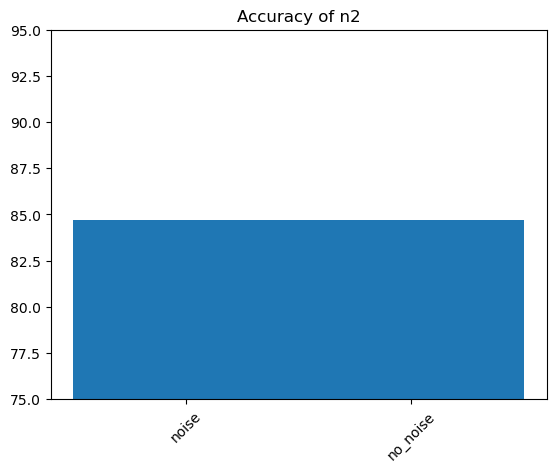

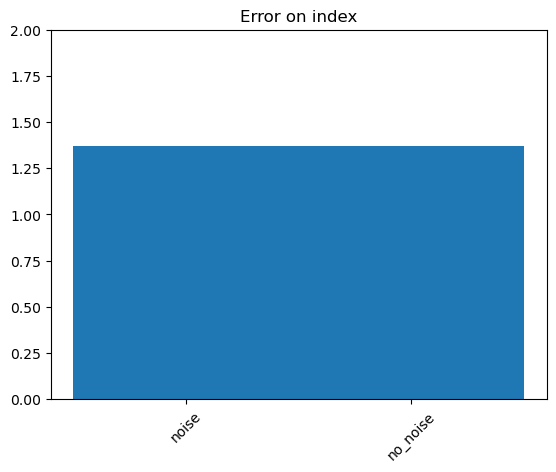

In [111]:
mean_accuracy_noise = np.zeros(2)
mean_index_error_noise = np.zeros(2)
noise_type_list = []


for index in range(len(noise_types)):
    noise_type_list += [noise_types[index][0]]
    mean_accuracy_noise[index] = np.mean(noise_types[index][1])
    mean_index_error_noise[index] = np.mean(noise_types[index][2])

x_positions = [0.5, 1.5]
y_positions = [75,95]
# plt.figure(figsize=(10,10))
plt.title("Accuracy of n2")
plt.stairs(mean_accuracy_noise, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, noise_type_list, rotation=45)
plt.show()

y_positions = [0,2]
# plt.figure(figsize=(10,10))
plt.title("Error on index")
plt.stairs(mean_index_error_noise, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, noise_type_list, rotation=45)
plt.show()

Noise does not make a difference